# Multilabel Classification in NLP 

- By Derek Lilienthal

This notebook will contain the necessary code in order to do multilabel classification on text data using a variety of different techniques. There will not be in-depth explanations on how each model works, but rather just code demonstrations on how to use each model and the pre-processing steps needed before actually running and training these models.

**Layout**
- Loading in the data
- Data Exploration
- Preprocessing the Text 
- Baseline Models
    - Naive Bayes
    - Support Vector Machines (SVM)
    - Logistic Regression
- More Advanced Models
    - Random Forest
    - XGBoost
    - Gradient Boosting
- Deep Learning Models
    - Feed Forward 
    - CNN
    - RNN
- 'State-of-the-art' Models (Transformers)
    - BERT

<hr>

*Hidding warnings*

In [1]:
import warnings

In [2]:
warnings.filterwarnings("ignore")

## Loading in the data

For this tutorial, we will be using movie plots from wikipedia to classify their genre. 

https://www.kaggle.com/jrobischon/wikipedia-movie-plots

In [3]:
import opendatasets as od # Allows us to download the data directly from kaggle

{"username":"dereklilienthal","key":"450b44bdec11e8a25f2bdb704097a58f"}

In [4]:
#od.download('https://www.kaggle.com/jrobischon/wikipedia-movie-plots')

In [5]:
import os

Taking a look at the downloaded directory

In [6]:
os.listdir('./wikipedia-movie-plots')

['wiki_movie_plots_deduped.csv']

Loading in the data

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('./wikipedia-movie-plots/wiki_movie_plots_deduped.csv')

Taking a look at the data

In [9]:
df

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...
...,...,...,...,...,...,...,...,...
34881,2014,The Water Diviner,Turkish,Director: Russell Crowe,Director: Russell Crowe\r\nCast: Russell Crowe...,unknown,https://en.wikipedia.org/wiki/The_Water_Diviner,"The film begins in 1919, just after World War ..."
34882,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the..."
34883,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,"Zafer, a sailor living with his mother Döndü i..."
34884,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romantic comedy,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...


For this tutorial, we only care for the *Genre* and *Plot* columns

In [10]:
df = df[['Genre', 'Plot']] # Filtering the dataset to only get those columns
df

,Genre,Plot
0,unknown,"A bartender is working at a saloon, serving dr..."
1,unknown,"The moon, painted with a smiling face hangs ov..."
2,unknown,"The film, just over a minute long, is composed..."
3,unknown,Lasting just 61 seconds and consisting of two ...
4,unknown,The earliest known adaptation of the classic f...
...,...,...
34881,unknown,"The film begins in 1919, just after World War ..."
34882,comedy,"Two musicians, Salih and Gürkan, described the..."
34883,comedy,"Zafer, a sailor living with his mother Döndü i..."
34884,romantic comedy,The film centres around a young woman named Am...


## Data Exploration
*This section isn't as relevent for our project because we should ideally already have an idea on the data and not need to filter out any examples and whatnot*

In [ ]:
import matplotlib.pyplot as plt

I will be doing a breaf amount of exporation. Mainly to count how many words there are in each plot and count how many labels there are etc...

Now I will be taking a look at how many words on average there are in each plot

In [11]:
temp_lengths = df['Plot'].apply(lambda x: len(x.split()))
temp_lengths

0         83
1         86
2         76
3        153
4        140
        ... 
34881    591
34882     11
34883     67
34884    193
34885     48
Name: Plot, Length: 34886, dtype: int64

In [12]:
temp_lengths.min()

2

In [13]:
temp_lengths.max()

6752

Some plots are really short and others are super long. For this tutorial, we will be filtering the plots to around 200 to 400 words each

In [14]:
mask = (temp_lengths >= 200) & (temp_lengths <= 400)
mask

0        False
1        False
2        False
3        False
4        False
         ...  
34881    False
34882    False
34883    False
34884    False
34885    False
Name: Plot, Length: 34886, dtype: bool

In [15]:
df = df[mask]
df = df.reset_index(drop=True)
df

,Genre,Plot
0,unknown,"Alice follows a large white rabbit down a ""Rab..."
1,western,The film opens with two bandits breaking into ...
2,short fantasy,"Though the film is presumed lost, a synopsis s..."
3,unknown,"In Kansas, Dorothy and Imogene the cow are cha..."
4,silent sports,"Though the film is presumed lost, a synopsis s..."
...,...,...
7434,romance,The film follows the lives of two people who l...
7435,drama,"The story is set in Istanbul, during the Pogro..."
7436,drama,One day in the lives of three young men from t...
7437,drama,İlyas (Kadir İnanır) is a truck driver from İs...


Now I will be selecting the top 10 genres in the dataset because there are a lot of genres. Ideally, we would want to bin all the subgenres together into a main genre but I don't have time to right now. I will also remove the unknown genres because those can easily be existing genres.

In [16]:
df['Genre'].value_counts()

unknown                   1402
drama                     1399
comedy                     907
romance                    261
western                    232
                          ... 
documentary short            1
zombie horror                1
crime-thriller               1
family, adventure            1
horror romantic comedy       1
Name: Genre, Length: 681, dtype: int64

There are 681 different unique categories. 

In [17]:
# Top 10 genres
top_10_g = df['Genre'].value_counts().index[1:11].values
top_10_g

array(['drama', 'comedy', 'romance', 'western', 'action', 'thriller',
       'horror', 'adventure', 'romantic comedy', 'crime'], dtype=object)

In [18]:
# Getting all the indexes where the genre is a top 20
indexes = []
for i in range(df.shape[0]):
    if df['Genre'].iloc[i] in top_10_g:
        indexes.append(i)
        
# Saving the new smaller dataset
df = df.iloc[indexes]
df = df.reset_index(drop=True)

In [19]:
df

,Genre,Plot
0,western,The film opens with two bandits breaking into ...
1,horror,Dr. Henry Jekyll (King Baggot) sends a note to...
2,drama,"The film begins with the Dreamer, a restless a..."
3,drama,A telephone operator is walking out with a han...
4,drama,"Frank Andrews (Donald Crisp) is a well-to-do, ..."
...,...,...
3654,thriller,"On his wedding anniversary, Han Chul-min (Jang..."
3655,romance,The film follows the lives of two people who l...
3656,drama,"The story is set in Istanbul, during the Pogro..."
3657,drama,One day in the lives of three young men from t...


Now we have 3659 examples with 10 categories where the plot is between 200 and 400 words.

In [ ]:
plt.figure(figsize=(10,5))
df['Genre'].value_counts().plot.barh()
plt.title("Number of genre examples")
plt.xticks(rotation=0);

## Pre-processing the Text Technique

When it comes to pre-processing text data, there is a lot that we can do and a lot we should do depending on what model we decide to use. For example, the statistical based models should need a lot more pre-processing of text compared to the deep learning and state-of-the-art models. I won't go over the reasons why this is, you'll have to take more machine learning courses and study NLP to find out why ;)

In [20]:
import nltk # NLTK stands for Natural Language Took Kit
from nltk.corpus import stopwords
import re # Regex
import string # String library has more string manipulation features

*Loading in Stop Words*

In [21]:
stop_words = stopwords.words('english')

*Loading in Stemmer*

- Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”. https://www.geeksforgeeks.org/python-stemming-words-with-nltk/

In [22]:
stemmer = nltk.SnowballStemmer("english")

This next function makes text lowercase, remove text in square brackets, remove links, remove punctuation, remove stopwords, use stemming, and remove words containing numbers. Depending on what's important to keep in our project, we may be adding more or removing more things when pre-processing.

In [23]:
def clean_text(text):
    text = str(text).lower() # Lowercases everything 
    text = re.sub('\[.*?\]', '', text) # Removes text in brackes
    text = re.sub('https?://\S+|www\.\S+', '', text) # Removes hyperlinks
    text = re.sub('<.*?>+', '', text) # Removes everything between '<' and '>'
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Removes all punctuation
    text = re.sub('\n', '', text) # Removes any breaklines
    text = re.sub('\w*\d\w*', '', text) # Removes any words that contain numbers 
    
    # Remove Stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    # Stemming
    text = ' '.join(stemmer.stem(word) for word in text.split())
    
    # Fixing extra whitespaces between words
    text = ' '.join(text.split())
    return text

**Cleaning responses**

Because in our actual problemset we will be working on will be different, we will need to be selective on what words we end up removing. But for this tutorial, I will keep both the original and cleaned data to show the difference in performance for each of the models

In [24]:
df['Plot_Clean'] = df['Plot'].apply(clean_text)
df

,Genre,Plot,Plot_Clean
0,western,The film opens with two bandits breaking into ...,film open two bandit break railroad telegraph ...
1,horror,Dr. Henry Jekyll (King Baggot) sends a note to...,dr henri jekyl king baggot send note fiancé al...
2,drama,"The film begins with the Dreamer, a restless a...",film begin dreamer restless disappoint dreamer...
3,drama,A telephone operator is walking out with a han...,telephon oper walk handsom polic sergeant fath...
4,drama,"Frank Andrews (Donald Crisp) is a well-to-do, ...",frank andrew donald crisp welltodo middl class...
...,...,...,...
3654,thriller,"On his wedding anniversary, Han Chul-min (Jang...",wed anniversari han chulmin jang hyuk drive ap...
3655,romance,The film follows the lives of two people who l...,film follow live two peopl live istanbul happe...
3656,drama,"The story is set in Istanbul, during the Pogro...",stori set istanbul pogrom septemb behçet murat...
3657,drama,One day in the lives of three young men from t...,one day live three young men neighborhood i̇zm...


**Remove any characters that are not english**

In [25]:
df['Plot_Clean'] = df['Plot_Clean'].apply(lambda x: ''.join(line for line in x if line in string.printable))
df['Plot'] = df['Plot'].apply(lambda x: ''.join(line for line in x if line in string.printable))

**Label Encoding the Genres**

Machine learning algorithms don't understand text by itself, so we will need to conver the Genre column to a numeric value.

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder() # Creating the label encoder
df['Genre_Label'] = le.fit_transform(df['Genre']) # Applying it to the Genre column
df

,Genre,Plot,Plot_Clean,Genre_Label
0,western,The film opens with two bandits breaking into ...,film open two bandit break railroad telegraph ...,9
1,horror,Dr. Henry Jekyll (King Baggot) sends a note to...,dr henri jekyl king baggot send note fianc ali...,5
2,drama,"The film begins with the Dreamer, a restless a...",film begin dreamer restless disappoint dreamer...,4
3,drama,A telephone operator is walking out with a han...,telephon oper walk handsom polic sergeant fath...,4
4,drama,"Frank Andrews (Donald Crisp) is a well-to-do, ...",frank andrew donald crisp welltodo middl class...,4
...,...,...,...,...
3654,thriller,"On his wedding anniversary, Han Chul-min (Jang...",wed anniversari han chulmin jang hyuk drive ap...,8
3655,romance,The film follows the lives of two people who l...,film follow live two peopl live istanbul happe...,6
3656,drama,"The story is set in Istanbul, during the Pogro...",stori set istanbul pogrom septemb behet murat ...,4
3657,drama,One day in the lives of three young men from t...,one day live three young men neighborhood izmi...,4


In [28]:
for i in range(10):
    warnings.filterwarnings(action='ignore', category=DeprecationWarning)
    print(f"Label {i}, Genre: {le.inverse_transform([i])}")

Label 0, Genre: ['action']
Label 1, Genre: ['adventure']
Label 2, Genre: ['comedy']
Label 3, Genre: ['crime']
Label 4, Genre: ['drama']
Label 5, Genre: ['horror']
Label 6, Genre: ['romance']
Label 7, Genre: ['romantic comedy']
Label 8, Genre: ['thriller']
Label 9, Genre: ['western']


**Shuffling the dataset**

We want to shuffle the dataset to prevent the models from optimizing based on the order the labels appear

In [29]:
df = df.sample(df.shape[0], random_state=43)
df = df.reset_index(drop=True)
df

,Genre,Plot,Plot_Clean,Genre_Label
0,drama,"While on a camping trip, sheep rancher Dan Log...",camp trip sheep rancher dan logan scott son in...,4
1,comedy,Mays Gilliam is the alderman for the 9th Ward ...,may gilliam alderman ward washington dc learn ...,2
2,drama,Rajesh is a teacher. His wife Shila is killed ...,rajesh teacher wife shila kill drive meet acci...,4
3,comedy,"Pepe (Cantinflas) is a hired hand, employed on...",pepe cantinfla hire hand employ ranch booz hol...,2
4,drama,When call girl Claudia Draper kills client All...,call girl claudia draper kill client allen gre...,4
...,...,...,...,...
3654,thriller,"Young billionaire Clay Beresford, Jr. (Hayden ...",young billionair clay beresford jr hayden chri...,8
3655,drama,"Two impecunious English sisters, Ellen and Agn...",two impecuni english sister ellen agn isit dul...,4
3656,drama,"At the age of 18, orphaned Peter Henderson lea...",age orphan peter henderson leav school middl t...,4
3657,romance,Bheemasena Rao (S. V. Ranga Rao) is a dignifie...,bheemasena rao v ranga rao dignifi respect man...,6


**Creating testing and training dataset**

When we train our models, it's helpful to know how well they are doing. One common way to find out is to break up the original dataset into a testing and training set. You train on the training set and make predictions on the testing data set.

For this tutorial, I will use 80% of the data for training and 20% for testing. Deciding the number of training and testing examples depends on how much data you have really. In general, you want to train on as much data as possible. 

Getting 80% of the data

In [30]:
num_training_examples = int(df.shape[0]*0.8)
df_train = df.iloc[:num_training_examples]
df_test = df.iloc[num_training_examples:]

In [31]:
df_train.shape

(2927, 4)

In [32]:
df_test.shape

(732, 4)

There is 2927 training examples and 732 testing examples

**Creating X_train, X_test, y_train, and y_test for cleaned and not cleaned data**

In [33]:
X_train_raw = df_train['Plot']
X_train_cleaned = df_train['Plot_Clean']

X_test_raw = df_test['Plot']
X_test_cleaned = df_test['Plot_Clean']

# We just use the labels and not the actual text
y_train = df_train['Genre_Label']
y_test = df_test['Genre_Label']

Looking at what everything looks like

In [34]:
X_train_raw

0       While on a camping trip, sheep rancher Dan Log...
1       Mays Gilliam is the alderman for the 9th Ward ...
2       Rajesh is a teacher. His wife Shila is killed ...
3       Pepe (Cantinflas) is a hired hand, employed on...
4       When call girl Claudia Draper kills client All...
                              ...                        
2922    Major Mahadevan (Mohanlal) is an officer deput...
2923    Jackie Morrison (Kate Dickie) works in Glasgow...
2924    Pat O'Brien plays ex-Army officer Steve Jameso...
2925    Chuck Murdock (Joshua Zuehlke), a 12-year-old ...
2926    In a seedy bar in a town ravaged by war, scien...
Name: Plot, Length: 2927, dtype: object

In [35]:
X_train_cleaned

0       camp trip sheep rancher dan logan scott son in...
1       may gilliam alderman ward washington dc learn ...
2       rajesh teacher wife shila kill drive meet acci...
3       pepe cantinfla hire hand employ ranch booz hol...
4       call girl claudia draper kill client allen gre...
                              ...                        
2922    major mahadevan mohanl offic deput nation secu...
2923    jacki morrison kate dicki work glasgow cctv op...
2924    pat obrien play exarmi offic steve jameson bec...
2925    chuck murdock joshua zuehlk boy montana son mi...
2926    seedi bar town ravag war scientist businessman...
Name: Plot_Clean, Length: 2927, dtype: object

In [36]:
X_test_raw

2927    When concert pianist Sandra Kovak (Mary Astor)...
2928    The respectable lives of Professor of English ...
2929    On an ocean liner from Colombo to Singapore, b...
2930    The story is set primarily on a train bound in...
2931    The lives of Atmaram (Nazir Hussain) and his w...
                              ...                        
3654    Young billionaire Clay Beresford, Jr. (Hayden ...
3655    Two impecunious English sisters, Ellen and Agn...
3656    At the age of 18, orphaned Peter Henderson lea...
3657    Bheemasena Rao (S. V. Ranga Rao) is a dignifie...
3658    Set in an affluent neighborhood of the San Fer...
Name: Plot, Length: 732, dtype: object

In [37]:
X_test_cleaned

2927    concert pianist sandra kovak mari astor aviat ...
2928    respect live professor english literatur thorn...
2929    ocean liner colombo singapor black sheep hugh ...
2930    stori set primarili train bound inland tibet s...
2931    live atmaram nazir hussain wife dulari turn up...
                              ...                        
3654    young billionair clay beresford jr hayden chri...
3655    two impecuni english sister ellen agn isit dul...
3656    age orphan peter henderson leav school middl t...
3657    bheemasena rao v ranga rao dignifi respect man...
3658    set affluent neighborhood san fernando valley ...
Name: Plot_Clean, Length: 732, dtype: object

*Labels*

In [38]:
y_train

0       4
1       2
2       4
3       2
4       4
       ..
2922    0
2923    8
2924    4
2925    4
2926    5
Name: Genre_Label, Length: 2927, dtype: int32

In [39]:
y_test

2927    4
2928    2
2929    6
2930    4
2931    4
       ..
3654    8
3655    4
3656    4
3657    6
3658    4
Name: Genre_Label, Length: 732, dtype: int32

## Baseline Models

I won't go into talking about how these models work, you'll have to take some ML classes or look it up online cause I could talk all day about it.

### Naive Bayes

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer # Tokenizes the data based on a term-frequency-inverse-document algorithm
from sklearn.feature_extraction.text import CountVectorizer # Implements tokenization and counts all in one
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

**Looking at the raw data first**

Making the model

In [41]:
NB_pipeline = Pipeline([
                ('tfidf', CountVectorizer(max_features=10000)), # Or try using TfidfVectorizer()
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ]) # Making a pipeline for the model

Training the model (Yes it's just one line of code lol)

In [42]:
NB_pipeline.fit(X_train_raw, y_train) 

Pipeline(steps=[('tfidf', CountVectorizer(max_features=10000)),
                ('clf', OneVsRestClassifier(estimator=MultinomialNB()))])

In [43]:
### Make predictions
y_hat = NB_pipeline.predict(X_test_raw)

Looking at what the model predicts

In [44]:
y_hat

array([4, 2, 4, 4, 6, 0, 4, 2, 4, 2, 2, 6, 4, 4, 4, 1, 6, 0, 2, 2, 2, 4,
       0, 4, 0, 0, 1, 4, 2, 2, 4, 2, 2, 4, 4, 4, 2, 6, 1, 7, 4, 6, 6, 9,
       2, 4, 4, 4, 4, 6, 4, 2, 0, 2, 6, 0, 2, 0, 6, 2, 2, 4, 4, 2, 2, 4,
       4, 2, 9, 5, 4, 4, 4, 4, 2, 6, 2, 5, 4, 2, 2, 4, 4, 2, 4, 4, 9, 4,
       4, 4, 8, 4, 9, 9, 6, 4, 0, 9, 2, 2, 4, 2, 4, 9, 4, 6, 4, 4, 4, 4,
       6, 4, 2, 3, 6, 4, 9, 2, 4, 1, 4, 4, 2, 4, 4, 1, 2, 4, 4, 4, 6, 2,
       2, 2, 5, 1, 4, 6, 2, 2, 4, 9, 2, 6, 4, 4, 4, 4, 2, 2, 2, 8, 5, 9,
       4, 4, 5, 2, 4, 4, 4, 2, 8, 2, 2, 4, 9, 4, 2, 2, 2, 2, 2, 4, 9, 8,
       2, 4, 2, 4, 6, 9, 2, 4, 4, 4, 9, 2, 4, 2, 0, 4, 4, 4, 0, 2, 2, 2,
       4, 2, 2, 8, 4, 4, 0, 4, 2, 2, 2, 1, 4, 4, 4, 4, 2, 0, 4, 2, 2, 2,
       2, 4, 4, 6, 6, 6, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 9, 5, 2, 4, 4, 2,
       3, 0, 2, 4, 4, 5, 4, 2, 4, 9, 6, 9, 2, 4, 2, 6, 4, 4, 1, 9, 6, 6,
       2, 2, 0, 4, 4, 2, 4, 1, 8, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 9, 2, 4,
       0, 4, 4, 2, 4, 2, 4, 2, 4, 4, 1, 4, 9, 6, 6,

Looking at the results

In [45]:
import seaborn as sns # For making graphs
import matplotlib.pyplot as plt
import numpy as np

Accuracy: 0.5396174863387978


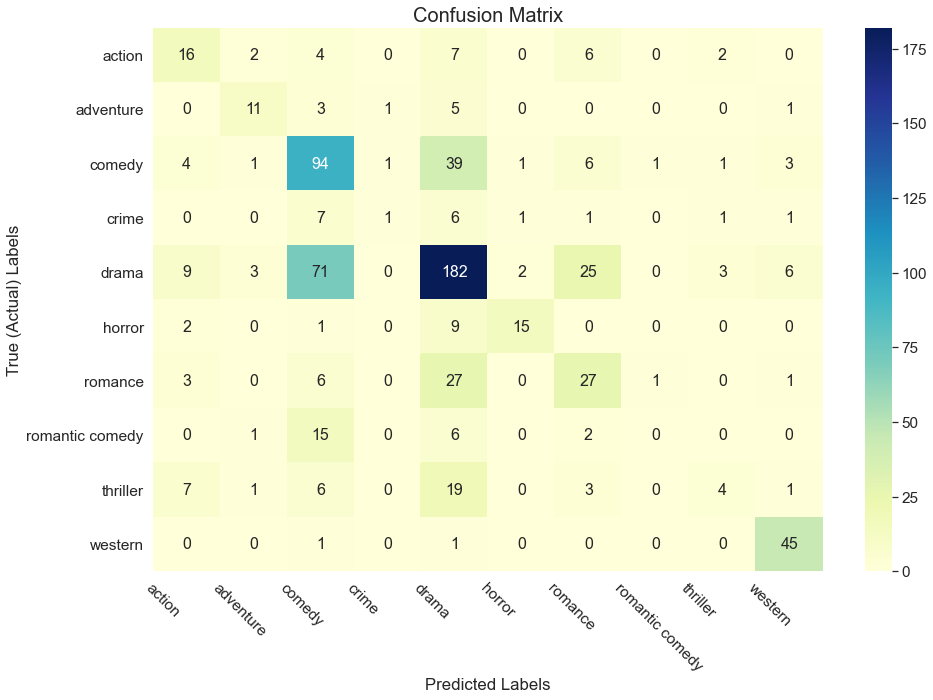

In [46]:
### Creating the labels
labels = []
for i in range(10):
    labels.append(le.inverse_transform([i])[0])

def print_cf(y_test, y_hat):
    print("Accuracy:", accuracy_score(y_test, y_hat))
    cm = confusion_matrix(y_test, y_hat)
    plt.figure(figsize=(15,10)) # Size of the graph
    sns.set(font_scale = 1.4, color_codes=True, palette="deep")
    sns.heatmap(pd.DataFrame(cm, index=labels, columns=list(range(10))), 
                annot = True,
                annot_kws = {"size":16},
                fmt="d",
                cmap="YlGnBu")
    plt.title("Confusion Matrix", size=20)
    plt.xlabel("Predicted Labels")
    plt.xticks(range(10), labels, rotation=-45, ha="left", rotation_mode="anchor")
    plt.ylabel("True (Actual) Labels")
    plt.show()
    
print_cf(y_test.values, y_hat)

We are only getting around 52% accuracy on the testing set with the raw data

**Testing with the cleaned data**

Accuracy: 0.5491803278688525


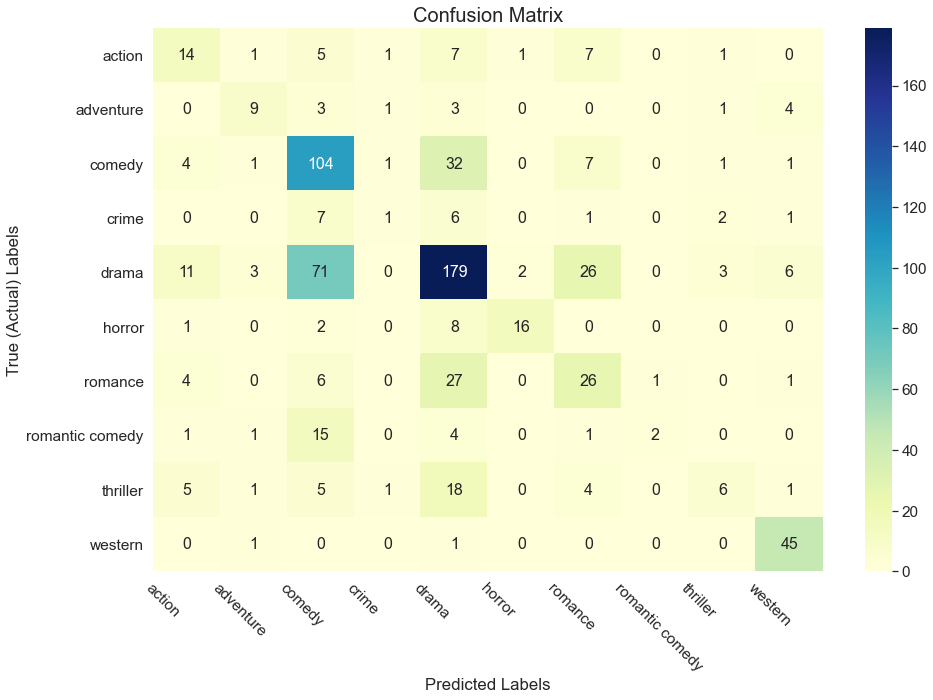

In [47]:
# Making the pipline
NB_pipeline = Pipeline([
                ('tfidf', CountVectorizer(max_features=10000)), # Try using CountVectorizer() instead of TfidfVectorizer() also. Sometimes it helps
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ]) 

# Training the data
NB_pipeline.fit(X_train_cleaned, y_train) 

### Make predictions
y_hat = NB_pipeline.predict(X_test_cleaned)

### Looking at the results
print_cf(y_test, y_hat)

The cleaned data didn't really help in this instance and got us an extra percentage. This is partly due to Naive Bayes generally not handing complex data very well

### Support Vector Machines (SVM)

In [48]:
from sklearn.svm import LinearSVC

**Raw Data**

Accuracy: 0.5669398907103825


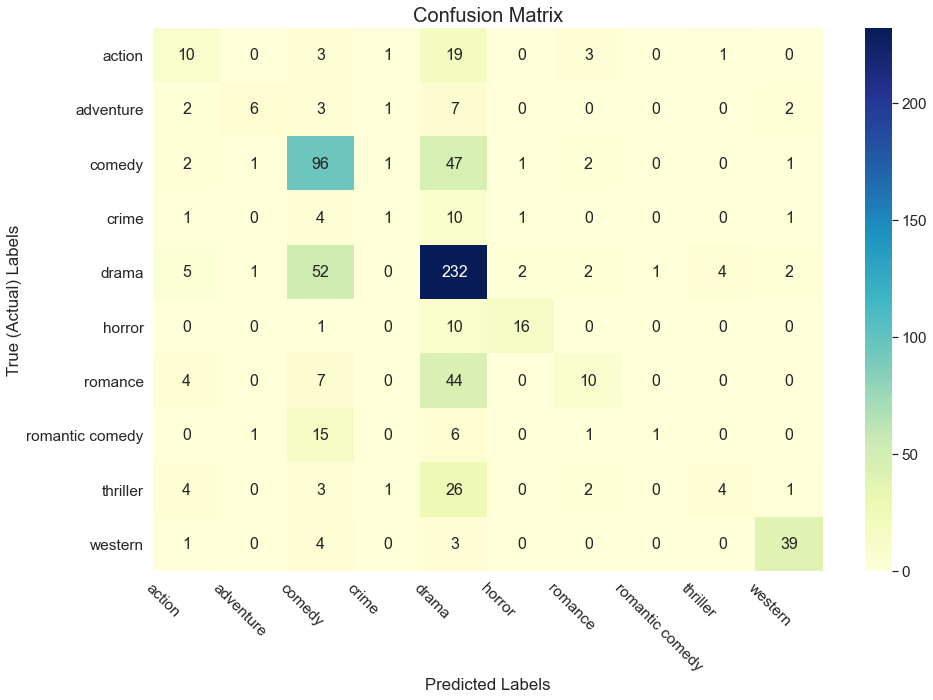

In [49]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LinearSVC(random_state=43), n_jobs=1)),
            ])

# Training the data
SVC_pipeline.fit(X_train_raw, y_train) 

### Make predictions
y_hat = SVC_pipeline.predict(X_test_raw)

### Looking at the results
print_cf(y_test, y_hat)

**Cleaned Data**

Accuracy: 0.575136612021858


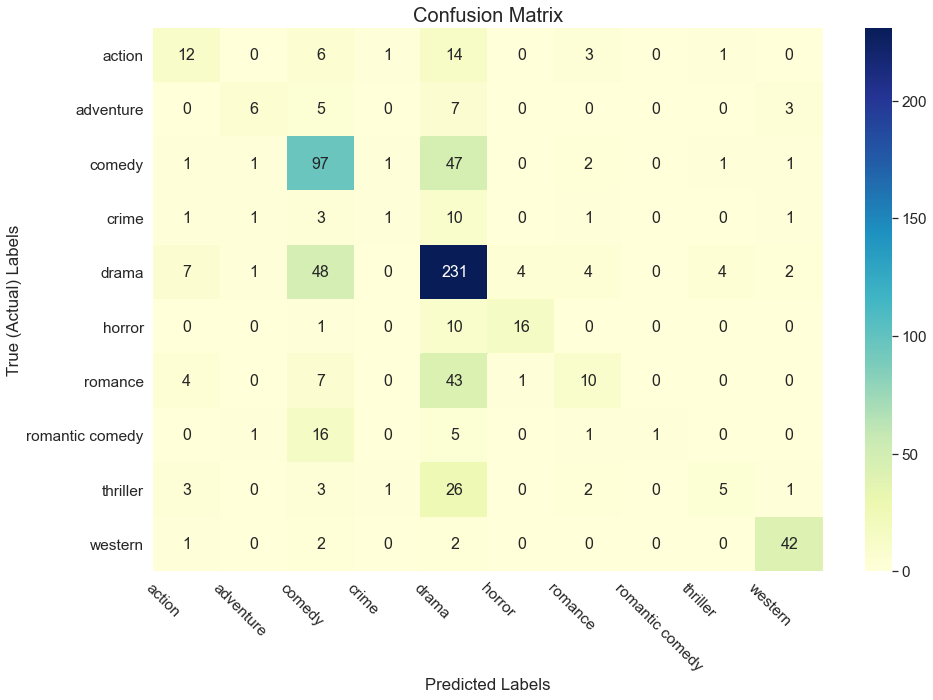

In [50]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LinearSVC(random_state=43), n_jobs=1)),
            ])

# Training the data
SVC_pipeline.fit(X_train_cleaned, y_train) 

### Make predictions
y_hat = SVC_pipeline.predict(X_test_cleaned)

### Looking at the results
print_cf(y_test, y_hat)

Cleaning the data didn't really helped with SVM's again

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

**Raw Data**

Accuracy: 0.5683060109289617


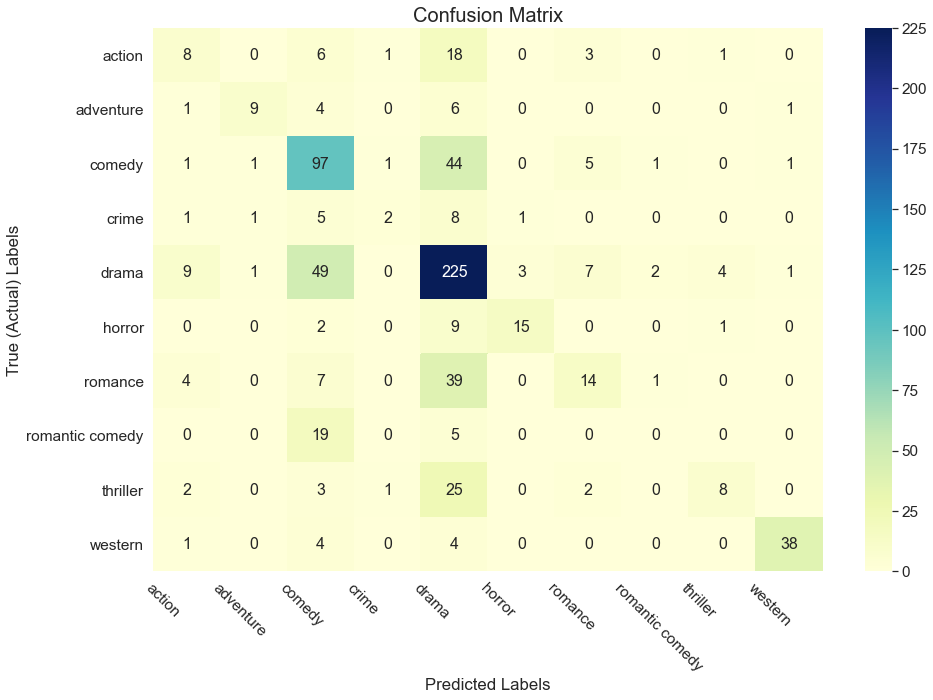

In [52]:
LR_pipeline = Pipeline([
                ('cv', CountVectorizer()),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag', 
                                                              random_state=43), n_jobs=1)),
            ])

# Training the data
LR_pipeline.fit(X_train_raw, y_train) 

### Make predictions
y_hat = LR_pipeline.predict(X_test_raw)

### Looking at the results
print_cf(y_test, y_hat)

**Cleaned Data**

Accuracy: 0.5833333333333334


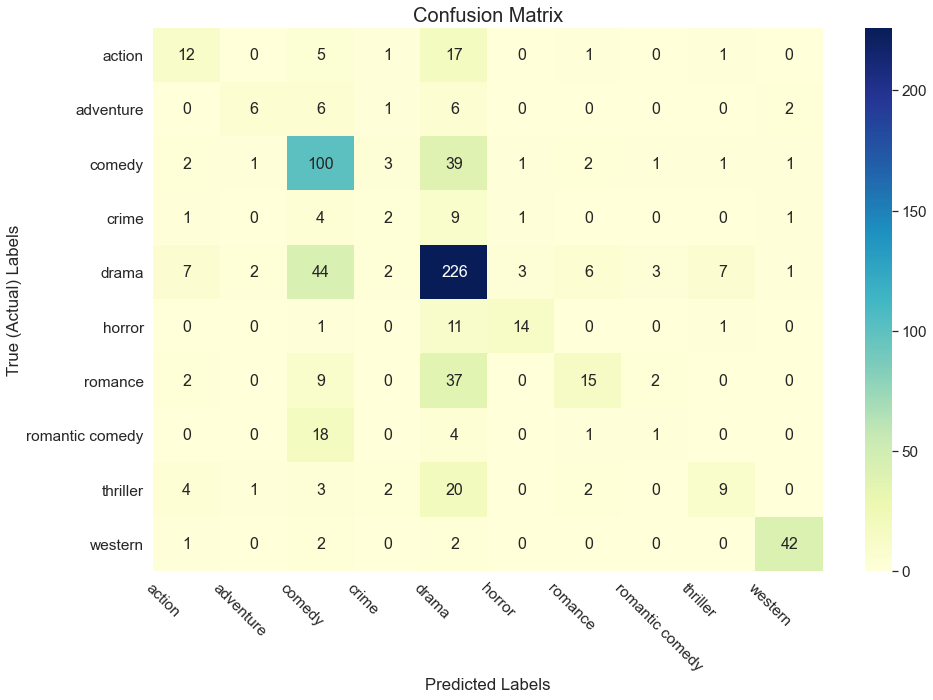

In [53]:
LR_pipeline = Pipeline([
                ('cv', CountVectorizer()),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag', 
                                                               random_state=43), n_jobs=1)),
            ])

# Training the data
LR_pipeline.fit(X_train_cleaned, y_train) 

### Make predictions
y_hat = LR_pipeline.predict(X_test_cleaned)

### Looking at the results
print_cf(y_test, y_hat)

Cleaning the data did help slightly with logistic regression

#### Results

| Model                         | Raw Data (Accuracy) | Cleaned Data (Accuracy) |
|-------------------------------|---------------------|-------------------------|
| Naive Bayes                   | 0.5204              | 0.5314                  |
| Support Vector Machines (SVM) | 0.5669              | 0.5751                  |
| Logistic Regression           | 0.5683              | 0.5833                  |

#### Take away's

A few things you need to remember when using something like Naive Bayes, Suport Vector Machines, and Logistic Regression is to try switching around using 

*TfidfVectorizer()* and *CountVectorizer()* in the pre-processing pipelines because this can have a large increase in accuracy.

## More Advanced Models

In this section, I start using models and using techniques that we may actually end up using in our project. 

First, to use some models that are not native to Sklearn, we need to create tokenization objects for the TfidfVectorizer and CountVectorizer.

In [54]:
# For raw data using the tfidf
tfidf_raw = TfidfVectorizer()
tfidf_raw.fit_transform(df['Plot'])

# For clean data using the tfidf
tfidf_clean = TfidfVectorizer()
tfidf_clean.fit_transform(df['Plot_Clean'])

# For raw data using the count vectorizer
cv_raw = CountVectorizer()
cv_raw.fit_transform(df['Plot'])

# For clean data using the count vectorizer
cv_clean = CountVectorizer()
cv_clean.fit_transform(df['Plot_Clean'])

<3659x32633 sparse matrix of type '<class 'numpy.int64'>'
	with 432127 stored elements in Compressed Sparse Row format>

### XGBoost

In [55]:
import numpy as np

In [56]:
from xgboost import XGBClassifier

In [57]:
import tensorflow as tf
tf.keras.backend.clear_session()

**Raw Data**

[0]	validation_0-merror:0.58607
[1]	validation_0-merror:0.53552
[2]	validation_0-merror:0.54645
[3]	validation_0-merror:0.53825
[4]	validation_0-merror:0.53688
[5]	validation_0-merror:0.53962
[6]	validation_0-merror:0.52322
[7]	validation_0-merror:0.51639
[8]	validation_0-merror:0.52186
[9]	validation_0-merror:0.52049
[10]	validation_0-merror:0.51093
[11]	validation_0-merror:0.50956
[12]	validation_0-merror:0.51503
[13]	validation_0-merror:0.50820
[14]	validation_0-merror:0.51366
[15]	validation_0-merror:0.51913
[16]	validation_0-merror:0.51639
[17]	validation_0-merror:0.52049
Accuracy: 0.4918032786885246


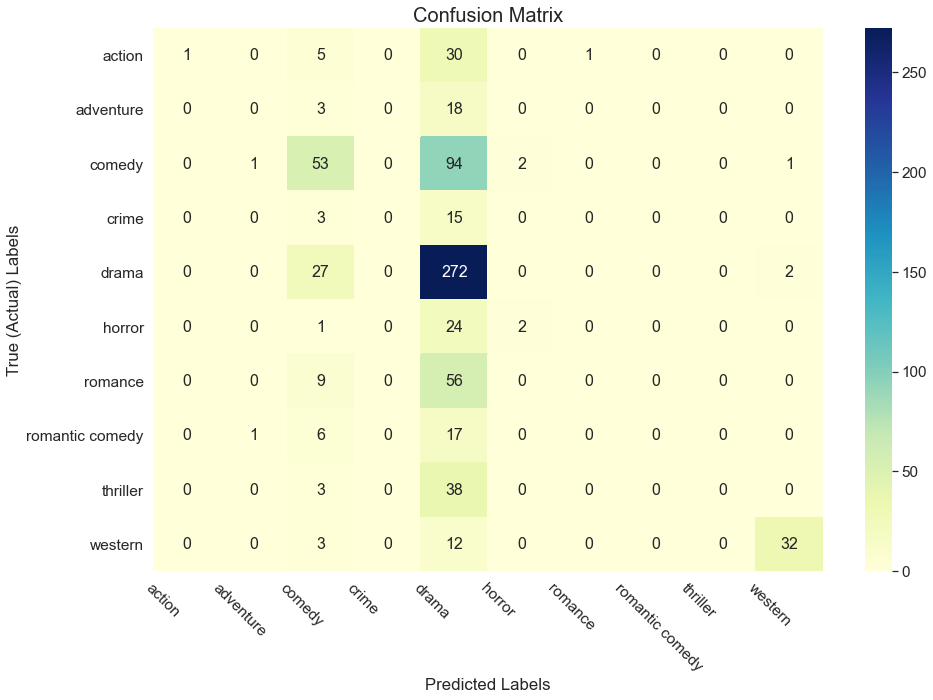

In [58]:
xgb = XGBClassifier(learning_rate=0.01,
                      num_class=10,
                      tree_method='gpu_hist', 
                      gpu_id=0, 
                      n_estimators=1000,
                      objective='milti:softmax',
                      max_depth=7,
                      gamma=1, 
                    subsample = 0.8, 
                    reg_alpha = 0.3, 
                    colsample_bytree = 0.4)

xgb.fit(cv_raw.transform(X_train_raw), 
        y_train,
        eval_set=[(cv_raw.transform(X_test_raw), y_test)],
        early_stopping_rounds=5, 
        eval_metric='merror') 
### Make predictions on the testing data
y_hat = xgb.predict(cv_raw.transform(X_test_raw))
print_cf(y_test, y_hat)

**Clean Data**

[0]	validation_0-merror:0.59973
[1]	validation_0-merror:0.55601
[2]	validation_0-merror:0.55191
[3]	validation_0-merror:0.53825
[4]	validation_0-merror:0.55191
[5]	validation_0-merror:0.54508
[6]	validation_0-merror:0.53142
[7]	validation_0-merror:0.53006
[8]	validation_0-merror:0.53006
[9]	validation_0-merror:0.53552
[10]	validation_0-merror:0.53825
[11]	validation_0-merror:0.52732
[12]	validation_0-merror:0.52596
[13]	validation_0-merror:0.51503
[14]	validation_0-merror:0.51366
[15]	validation_0-merror:0.51913
[16]	validation_0-merror:0.51913
[17]	validation_0-merror:0.51913
[18]	validation_0-merror:0.52186
[19]	validation_0-merror:0.51503
Accuracy: 0.48633879781420764


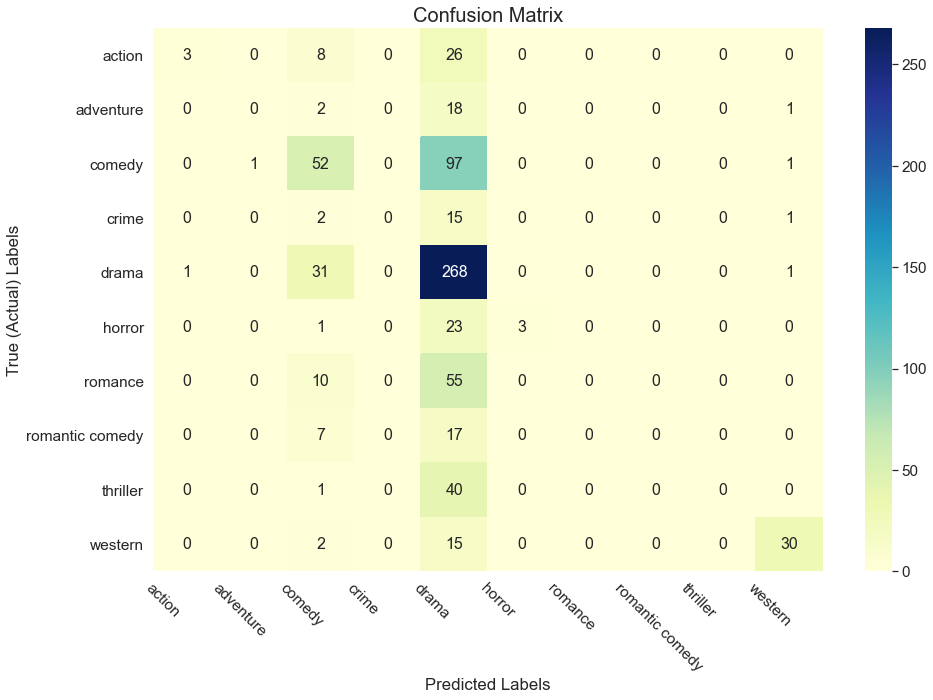

In [59]:
xgb = XGBClassifier(learning_rate=0.01,
                      num_class=10,
                      tree_method='gpu_hist', 
                      gpu_id=0, 
                      n_estimators=1000,
                      objective='milti:softmax',
                      max_depth=7,
                      gamma=1, 
                    subsample = 0.8, 
                    reg_alpha = 0.3, 
                    colsample_bytree = 0.4)

xgb.fit(cv_clean.transform(X_train_cleaned), 
        y_train,
        eval_set=[(cv_clean.transform(X_test_cleaned), y_test)],
        early_stopping_rounds=5, 
        eval_metric='merror') 
### Make predictions on the testing data
y_hat = xgb.predict(cv_clean.transform(X_test_cleaned))
print_cf(y_test, y_hat)

### Random Forest

In [60]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


Accuracy: 0.4822404371584699


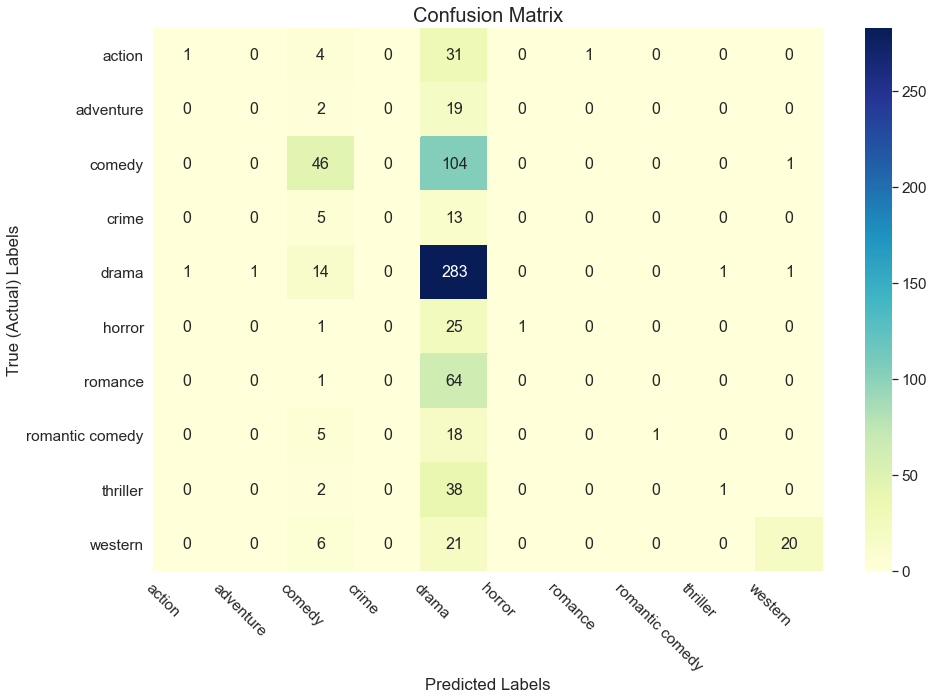

In [61]:
### Create a logistic regression model
clf = RandomForestClassifier(n_estimators=100,
                             n_jobs=16,
                             random_state=42, 
                             verbose=1)
### Training the model
clf.fit(tfidf_raw.transform(X_train_raw), y_train)
### Making predictions on the testing data
y_prob = clf.predict_proba(tfidf_raw.transform(X_test_raw))
y_hat = np.argmax(y_prob, axis=1)

print_cf(y_test, y_hat)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


Accuracy: 0.4890710382513661


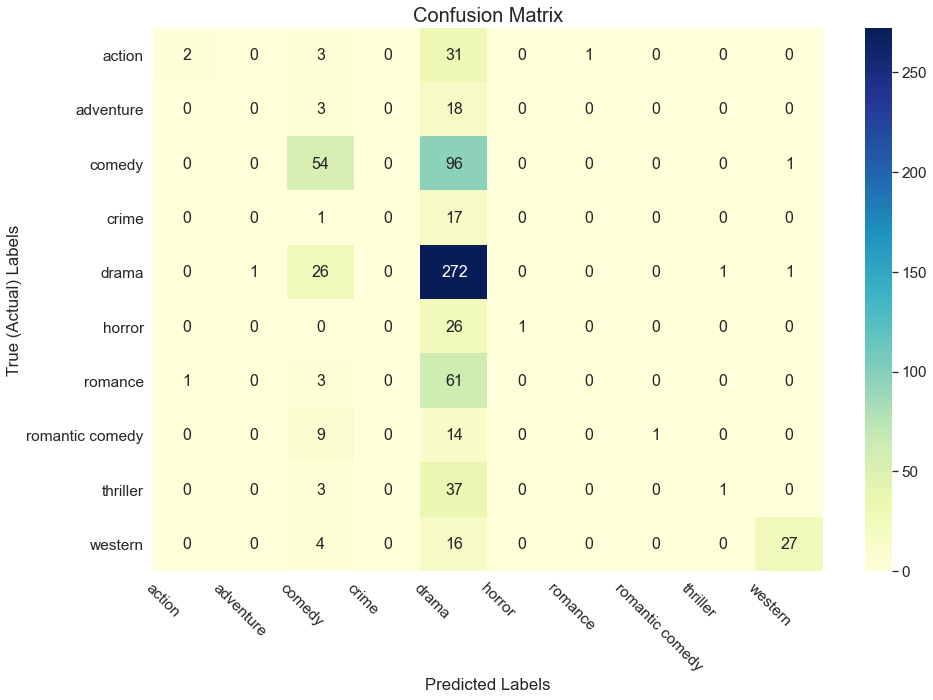

In [62]:
### Create a logistic regression model
clf = RandomForestClassifier(n_estimators=100,
                             n_jobs=16,
                             random_state=42, 
                             verbose=1)
### Training the model
clf.fit(tfidf_clean.transform(X_train_cleaned), y_train)
### Making predictions on the testing data
y_prob = clf.predict_proba(tfidf_clean.transform(X_test_cleaned))
y_hat = np.argmax(y_prob, axis=1)

print_cf(y_test, y_hat)

**Using RandomSearch to find the best hyperparameters**

Machine learning models sometimes have a lot of hyperparameters to choose from. This can make it very difficult to find which combinations are the best. A common way to figure out which one's are the best is using a Random Search. 

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
### First, define the model
RFC = RandomForestClassifier()

### Then define what hyperparameters we are going to use
grid = {'bootstrap': [True, False],
        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
       }

### Create the random search
clf = RandomizedSearchCV(RFC, 
                         grid, 
                         random_state=0,
                         scoring='accuracy',
                         verbose=2,
                         n_jobs=16, 
                         n_iter=30, # Try 30 models
                         cv=3) # 3 fold cross validation for each model

### Start training the random search
results = clf.fit(tfidf_clean.transform(X_train_cleaned), y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


*Looking at the best parameters found by doing random search*

In [79]:
results.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': False}

*Training with the new best parameters*

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    1.4s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    2.6s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    4.2s
[Parallel(n_jobs=16)]: Done 1600 out of 1600 | elapsed:    5.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 1600 out of 1600 | elapsed:    0.6s finished


Accuracy: 0.5122950819672131


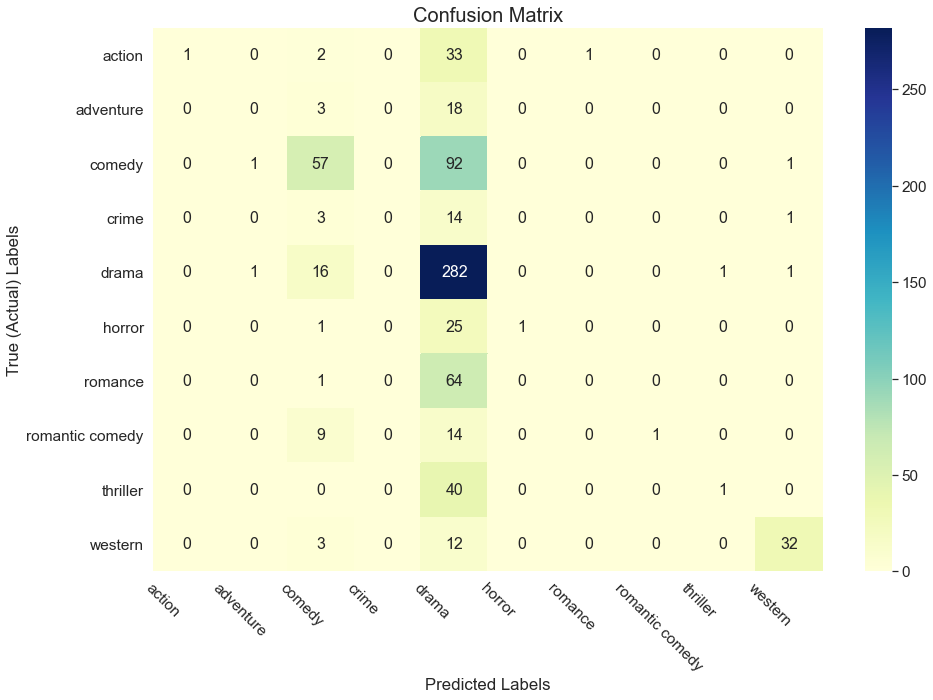

In [80]:
RFC_best = RandomForestClassifier(**results.best_params_, ### Unpacking the best parameters into a new mode
                                 n_jobs=16,
                                 verbose=1)

### Training the model
RFC_best.fit(tfidf_clean.transform(X_train_cleaned), y_train)
### Making predictions on the testing data
y_prob = RFC_best.predict_proba(tfidf_clean.transform(X_test_cleaned))
y_hat = np.argmax(y_prob, axis=1)

print_cf(y_test, y_hat)

Doing a random search improved the accuracy from before, but the model still doesn't compare to the baselines that were simpler. Sometimes, it happens and that's why we always want to check simple models to make sure that we can make sizeable improvements over them.

### Gradient Boosting

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
import time as time

In [ ]:
gbr = GradientBoostingClassifier(n_iter_no_change=10, 
                                validation_fraction=0.2)

gbr_parameters = {
    'learning_rate' : [1.0, 0.1, 0.01, 0.001],
    'max_depth' : [2, 3, 5, 8, 10, 15, 20, 50, 75, 100],
    'min_samples_split': [2,3,4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [100, 300, 500, 700, 900, 1200, 1500]
}

gbr_gs = RandomizedSearchCV(gbr, 
                          gbr_parameters, 
                          cv=3,
                          n_jobs=16, 
                          return_train_score=False, 
                          scoring='accuracy', 
                          n_iter=30,
                          verbose=3)

### Start the gridsearch
start = time.time()
gbr_gs.fit(tfidf_clean.transform(X_train_cleaned), y_train)
end = time.time()
print("Runtime of the random search is {:.2f} seconds".format(end - start))

### Save the parameters
gbr_best_parameters = gbr_gs.best_params_

### Print the results
print('\n#### Best Parameters ####')
[print(key, value, sep=' = ') for key, value in gbr_gs.best_params_.items()]

### Make predictions
y_hat = gbr_gs.predict(tfidf_clean(X_test_cleaned))
print("\nMSE: {:.4f}".format(np.average((y_test - y_hat) ** 2)))

Fitting 3 folds for each of 30 candidates, totalling 90 fits


Doing Gradient Boosting took sigificantly longer compared to XGBoost because XGBoost was able to utilize a GPU for training. Which speed up the training time tremendously. Gradient Boosting through Sklearn doesn't have that ability unfortunetly :(

In [ ]:
print_cf(y_test, y_hat)

## Deep Learning Models

In [54]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
import numpy as np

**Tokenizing the datasets**

A part of NLP is tokenizing each word in the dataset. Tokenizing is translating the words in a story to a unique token. For deep learning, it's easiest to just create another model that essentially tokenizes each word for us as part of the training process instead of manually doing it.

In [55]:
MAX_FUNCTION_LEN = 500
MAX_FUNCTION_WORDS = 20000 # Selecting the top 20k words

entire_dataset = df['Plot'].tolist()
entire_dataset_clean = df['Plot_Clean'].tolist()

# One-hot encode the data
vectorizer = layers.TextVectorization(
    standardize=None,
    max_tokens=MAX_FUNCTION_WORDS,
    output_mode='int',
    output_sequence_length=MAX_FUNCTION_LEN)
vectorizer.adapt(tf.data.Dataset.from_tensor_slices(entire_dataset+entire_dataset_clean)) 

# Encode the training data to a vector
vectorize_model = Sequential()
vectorize_model.add(tf.keras.Input(shape=(None,), dtype=tf.string))
vectorize_model.add(vectorizer)

# Creating tokenized
X_tokens = vectorize_model.predict(entire_dataset)
X_tokens_clean = vectorize_model.predict(entire_dataset_clean)

function_word_index = dict(zip(vectorizer.get_vocabulary(), 
                               np.arange(MAX_FUNCTION_WORDS)))
NUM_FUNCTION_WORDS = len(function_word_index)
print(f'Found {NUM_FUNCTION_WORDS} unique function word tokens')

print(f'Input data shape -> {X_tokens.shape}')
print(f'Clean input data shape -> {X_tokens_clean.shape}')

Found 20000 unique function word tokens
Input data shape -> (3659, 500)
Clean input data shape -> (3659, 500)


*Taking a look at the tokens*

In [56]:
X_tokens

array([[  298,    19,     5, ...,     0,     0,     0],
       [    1, 15108,     7, ...,     0,     0,     0],
       [ 5517,     7,     5, ...,     0,     0,     0],
       ...,
       [  252,     2,   798, ...,     0,     0,     0],
       [    1,  2082, 14010, ...,     0,     0,     0],
       [ 3991,     9,    25, ...,     0,     0,     0]], dtype=int64)

In [57]:
X_tokens_clean

array([[  841,   592,  4210, ...,     0,     0,     0],
       [  489, 13496,     1, ...,     0,     0,     0],
       [ 3506,   572,    53, ...,     0,     0,     0],
       ...,
       [  798,  1309,   568, ...,     0,     0,     0],
       [    1,   925,  6639, ...,     0,     0,     0],
       [  151,  5505,  1685, ...,     0,     0,     0]], dtype=int64)

*Creating a dictionary to translate each sentence*

In [58]:
reverse_comment_word_index = {v: k for k, v in function_word_index.items()}
def translate_tokens(token_list):
    result_str = ''
    for token in token_list:
        if token != 0:
            result_str += reverse_comment_word_index[token] + ' '
    print(result_str)

*Taking a look at the first example and the conversion*

In [59]:
X_tokens[0]

array([  298,    19,     5, 14801,  5385,  4210,  2256,  1428,  6407,
           1,     4,     8,    63,    32,  3970,  6547,     3,     5,
         235,  1677,  9684,  1551,    26,     5,  7224,  3063,     1,
        1541,    70,    45,     9,     5,  1444,   960,     9,    82,
          31,    32,  1475, 12776,   878,     3,   792,     1,     4,
        5438,     3,    72,    30,  2343,    15,     5,  1443,   772,
           1,    16,  1419,    29,     2,  2148,    18,   837,   210,
         390,    25,  1875,     3,  3392,     2,     1,     6,     5,
        9684,  1551,    19,     1,  6407,   173,     3,   537,  1239,
           1,    14,    30, 12802,    23,    12,     4,     8,   160,
        4162,     1,    32,     1,    26,  1007,     1,    15,  1444,
        3602,     4,    15,     1, 18775,     5,     1,  1608,  1872,
         977,   187,     1,    15,    30,     1,     6, 10883,    34,
           7, 11709,     4,   262,   439,     1,    15,     2,  1973,
          14, 13114,

In [60]:
translate_tokens(X_tokens[0])

While on a camping trip, sheep rancher Dan Logan [UNK] and his son are inadvertently exposed to a secret Army nerve gas from a helicopter passing [UNK] Both end up in a military hospital in which they are kept apart, unable to contact [UNK] and lied to about their condition by a mysterious major [UNK] who looks at the incident as little more than an opportunity to study the [UNK] of a nerve gas on [UNK] Logan tries to hold someone [UNK] for their actions, but he and his family physician [UNK] are [UNK] from every [UNK] by military authorities and by [UNK] staging a [UNK] those responsible already well [UNK] by their [UNK] of power. He is hospitalized and put under [UNK] by the government for symptoms related to exposure to nerve agents, and to record his [UNK] responses to the [UNK] [UNK] increasingly anxious over his son, Logan leaves his room to search the hospital. His investigation leads him to the [UNK] where he is traumatized to find his son dead. Initially stunned and shocked at

[UNK] means the word that was there was not in the top 20k words

In [217]:
### Helper function for us to visualize the results of training 
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    print("Lowest Validation Loss: epoch {}".format(np.argmin(val_loss)+1))
    print("Highest Validation Accuracy: epoch {}".format(np.argmax(val_acc)+1))

### Feed Forward (Dense) Model

In [181]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping

In order for us to use deep learning models, we will need to convert the data into numeric values before feeding it into the model 

**Making the model**

Things you can mess with are:
- The number of embedding dimentions (EMBEDDING_DIM)
- The number of cells (NUM_DENSE_CELLS)
- The amount of dropout (between 0 and 1)
- Switching between GlobalMaxPooling1D and GlobalAveragePooling1D
- Trying SpatialDropout1D or BatchNormalization after the embedding layer

In [218]:
tf.keras.backend.clear_session()

EMBEDDING_DIM = 512
NUM_DENSE_CELLS = 256
dropout = 0.3

inputs = layers.Input(dtype=tf.string, shape=(None,)) # Allow for variable input lengths
x = vectorize_model(inputs)
x = layers.Embedding(input_dim=NUM_FUNCTION_WORDS, 
                     output_dim=EMBEDDING_DIM, 
                     mask_zero=True)(x)
#x = layers.BatchNormalization()(x)
#x = layers.SpatialDropout1D(dropout)(x)

x = layers.GlobalAveragePooling1D()(x)
#x = layers.GlobalMaxPooling1D()(x)

x = layers.Dense(NUM_DENSE_CELLS, activation='relu')(x)
x = layers.Dropout(dropout)(x)
output = layers.Dense(10, activation='softmax')(x)

model = Model(inputs, output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
sequential (Sequential)      (None, 500)               0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 512)          10240000  
_________________________________________________________________
global_average_pooling1d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570  

*Visual diagram of the model graph*

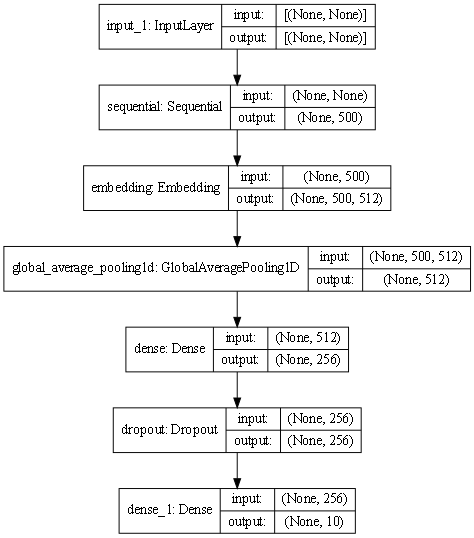

In [219]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=70)

After we make our model, we next need to compile it. Which pretty much just get's is ready for training (in simple terms).

In [220]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/50
37/37 [==============================] - 1s 13ms/step - loss: 2.0310 - accuracy: 0.3751 - val_loss: 1.8572 - val_accuracy: 0.3515
Epoch 2/50
37/37 [==============================] - 0s 11ms/step - loss: 1.6968 - accuracy: 0.3968 - val_loss: 1.7448 - val_accuracy: 0.3601
Epoch 3/50
37/37 [==============================] - 0s 11ms/step - loss: 1.4519 - accuracy: 0.4981 - val_loss: 1.5946 - val_accuracy: 0.4881
Epoch 4/50
37/37 [==============================] - 0s 11ms/step - loss: 1.0669 - accuracy: 0.6689 - val_loss: 1.4396 - val_accuracy: 0.5375
Epoch 5/50
37/37 [==============================] - 0s 11ms/step - loss: 0.6994 - accuracy: 0.7821 - val_loss: 1.4170 - val_accuracy: 0.5529
Epoch 6/50
37/37 [==============================] - 0s 11ms/step - loss: 0.4340 - accuracy: 0.8898 - val_loss: 1.4599 - val_accuracy: 0.5717
Epoch 7/50
37/37 [==============================] - 0s 11ms/step - loss: 0.2494 - accuracy: 0.9705 - val_loss: 1.5083 - val_accuracy: 0.5666
Epoch 8/50
37

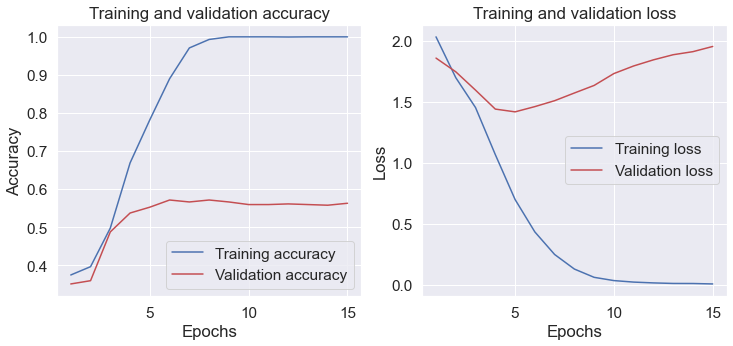

In [221]:
### Early stopping will help us stop early when the model is no longer training

early_stopping = EarlyStopping(patience=10, # Stop after 10 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=True, # Restore the best weights
                               verbose=1) # Tells us when we stopped

### Training the model
history = model.fit(X_train_cleaned,
                    y_train, 
                    epochs=50, # How many times to run through the training data
                    batch_size=64, # How many samples to send through at each time
                    validation_split=0.2, # Splitting 20% of the training data for validation
                    callbacks=[early_stopping],
                    verbose=1)

### Looking at our training results
print('\n')
plot_history(history)

Checking how our models did

Accuracy: 0.546448087431694


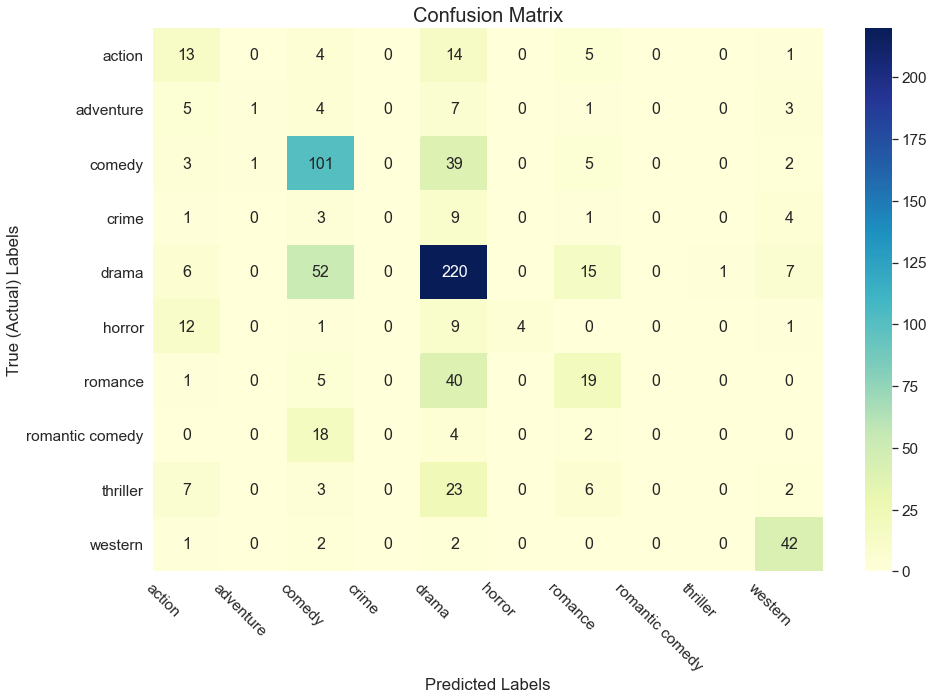

In [222]:
y_test_hat = model.predict(X_test_cleaned)
y_hat = np.argmax(y_test_hat, axis=1)
print_cf(y_test, np.argmax(y_test_hat, axis=1))

Our baseline deep learning model got aorund 55% accuracy in total

### CNN Model

Aside from the same features to experiment with in the Feed Forward network, some new things you can experiment with are 
- Number of Convolutional Filters (n_conv)
- Length of the kernel (k_conv)
- Stacking CNN layers

In [273]:
tf.keras.backend.clear_session()
EMBEDDING_DIM = 512
NUM_DENSE_CELLS = 256
dropout = 0.2
n_conv = 512 # number of filters/kernals (filters=n_conv) 
k_conv = 2 # Kernel Length (kernal_size=k_conv)

inputs = layers.Input(dtype=tf.string, shape=(None,)) # Allow for variable input lengths
x = vectorize_model(inputs)
x = layers.Embedding(input_dim=NUM_FUNCTION_WORDS, 
                     output_dim=EMBEDDING_DIM, 
                     mask_zero=True)(x)

#x = layers.SpatialDropout1D(dropout)(x)
x = layers.Conv1D(n_conv, k_conv, activation='relu')(x)
#x = layers.Conv1D(n_conv, k_conv)(x)
#x = layers.GlobalAveragePooling1D()(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(NUM_DENSE_CELLS, activation='relu')(x)
x = layers.Dropout(dropout)(x)
output = layers.Dense(10, activation='softmax')(x)

model = Model(inputs, output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
sequential (Sequential)      (None, 500)               0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 512)          10240000  
_________________________________________________________________
conv1d (Conv1D)              (None, 499, 512)          524800    
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0     

Epoch 1/50
37/37 [==============================] - 1s 26ms/step - loss: 1.8548 - accuracy: 0.3682 - val_loss: 1.8511 - val_accuracy: 0.3515
Epoch 2/50
37/37 [==============================] - 1s 24ms/step - loss: 1.6276 - accuracy: 0.4511 - val_loss: 1.7033 - val_accuracy: 0.4010
Epoch 3/50
37/37 [==============================] - 1s 24ms/step - loss: 1.2036 - accuracy: 0.6138 - val_loss: 1.4624 - val_accuracy: 0.5085
Epoch 4/50
37/37 [==============================] - 1s 24ms/step - loss: 0.6774 - accuracy: 0.7903 - val_loss: 1.3829 - val_accuracy: 0.5256
Epoch 5/50
37/37 [==============================] - 1s 24ms/step - loss: 0.2897 - accuracy: 0.9462 - val_loss: 1.3336 - val_accuracy: 0.5597
Epoch 6/50
37/37 [==============================] - 1s 24ms/step - loss: 0.0959 - accuracy: 0.9962 - val_loss: 1.3921 - val_accuracy: 0.5546
Epoch 7/50
37/37 [==============================] - 1s 23ms/step - loss: 0.0375 - accuracy: 0.9991 - val_loss: 1.4114 - val_accuracy: 0.5648
Epoch 8/50
37

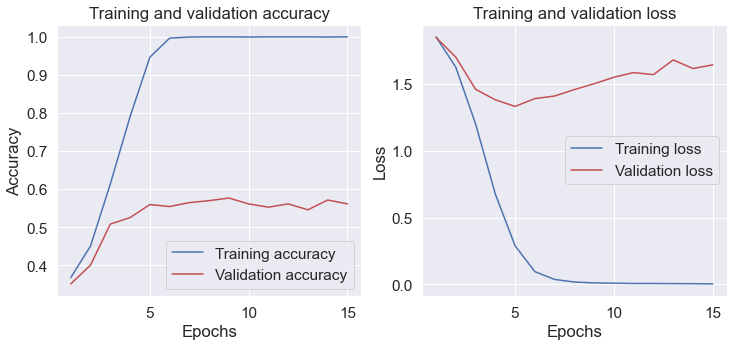

In [274]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(patience=10, 
                               monitor='val_loss', 
                               min_delta=0, 
                               mode='min', 
                               restore_best_weights=True, 
                               verbose=1) 

history = model.fit(X_train_cleaned,
                    y_train, 
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

print('\n')
plot_history(history)

Accuracy: 0.5560109289617486


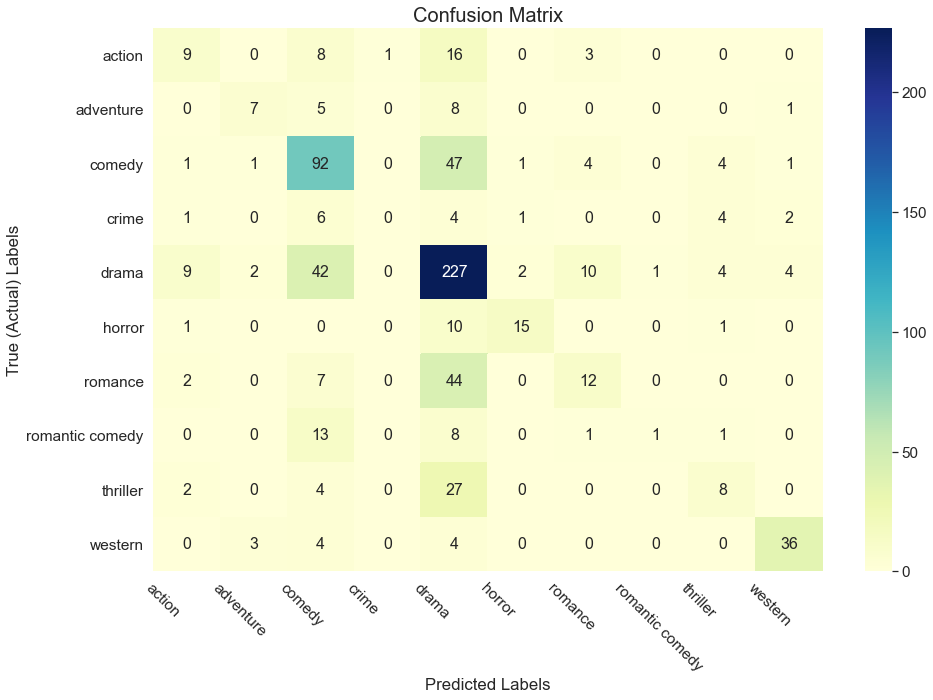

In [275]:
y_test_hat = model.predict(X_test_cleaned)
y_hat = np.argmax(y_test_hat, axis=1)
print_cf(y_test, np.argmax(y_test_hat, axis=1))

The model that used a CNN got about 55-56% accuracy and didn't improve much 

### RNN Model

The RNN model is more complex again. The main things to experiment with here is just the 
- Number of RNN cells (n_cells)
- Stacking RNN layers
- Switching out LSTM for GRU

In [288]:
tf.keras.backend.clear_session()
EMBEDDING_DIM = 512
NUM_DENSE_CELLS = 256
dropout = 0.4
n_cells = 256 # number of RNN Cells  

inputs = layers.Input(dtype=tf.string, shape=(None,)) # Allow for variable input lengths
x = vectorize_model(inputs)
x = layers.Embedding(input_dim=NUM_FUNCTION_WORDS, 
                     output_dim=EMBEDDING_DIM, 
                     mask_zero=True)(x)
#x = layers.SpatialDropout1D(dropout)(x)
x = layers.Bidirectional(layers.LSTM(n_cells, return_sequences=True))(x)
x = layers.BatchNormalization()(x)
x = layers.GlobalMaxPooling1D()(x)
#x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(NUM_DENSE_CELLS, activation='relu')(x)
x = layers.Dropout(dropout)(x)
output = layers.Dense(10, activation='softmax')(x)

model = Model(inputs, output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
sequential (Sequential)      (None, 500)               0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 512)          10240000  
_________________________________________________________________
bidirectional (Bidirectional (None, 500, 512)          1574912   
_________________________________________________________________
batch_normalization (BatchNo (None, 500, 512)          2048      
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328

Epoch 1/50
37/37 [==============================] - 7s 103ms/step - loss: 1.8857 - accuracy: 0.3661 - val_loss: 2.2532 - val_accuracy: 0.4215
Epoch 2/50
37/37 [==============================] - 3s 74ms/step - loss: 1.0735 - accuracy: 0.6450 - val_loss: 2.2138 - val_accuracy: 0.4898
Epoch 3/50
37/37 [==============================] - 3s 74ms/step - loss: 0.4319 - accuracy: 0.8672 - val_loss: 2.1486 - val_accuracy: 0.5324
Epoch 4/50
37/37 [==============================] - 3s 75ms/step - loss: 0.1407 - accuracy: 0.9688 - val_loss: 2.0424 - val_accuracy: 0.5478
Epoch 5/50
37/37 [==============================] - 3s 74ms/step - loss: 0.0571 - accuracy: 0.9880 - val_loss: 1.9832 - val_accuracy: 0.5461
Epoch 6/50
37/37 [==============================] - 3s 74ms/step - loss: 0.0214 - accuracy: 0.9979 - val_loss: 1.7857 - val_accuracy: 0.5358
Epoch 7/50
37/37 [==============================] - 3s 75ms/step - loss: 0.0441 - accuracy: 0.9936 - val_loss: 1.8371 - val_accuracy: 0.4505
Epoch 8/50
3

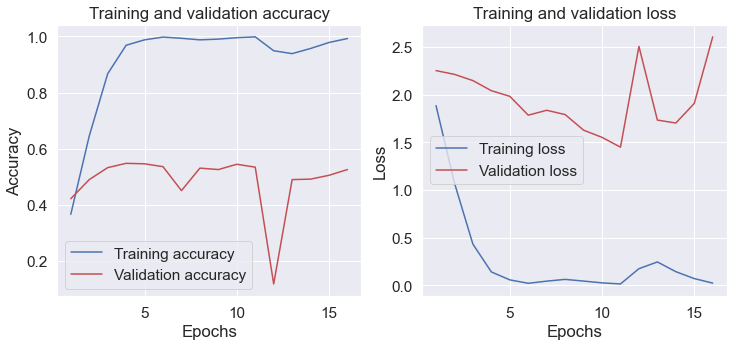

In [289]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(patience=5, # Stop after 3 epochs of no improvement
                               monitor='val_loss', 
                               min_delta=0, 
                               mode='min',
                               restore_best_weights=True, 
                               verbose=1) 

history = model.fit(X_train_cleaned,
                    y_train, 
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

print('\n')
plot_history(history)

Accuracy: 0.5341530054644809


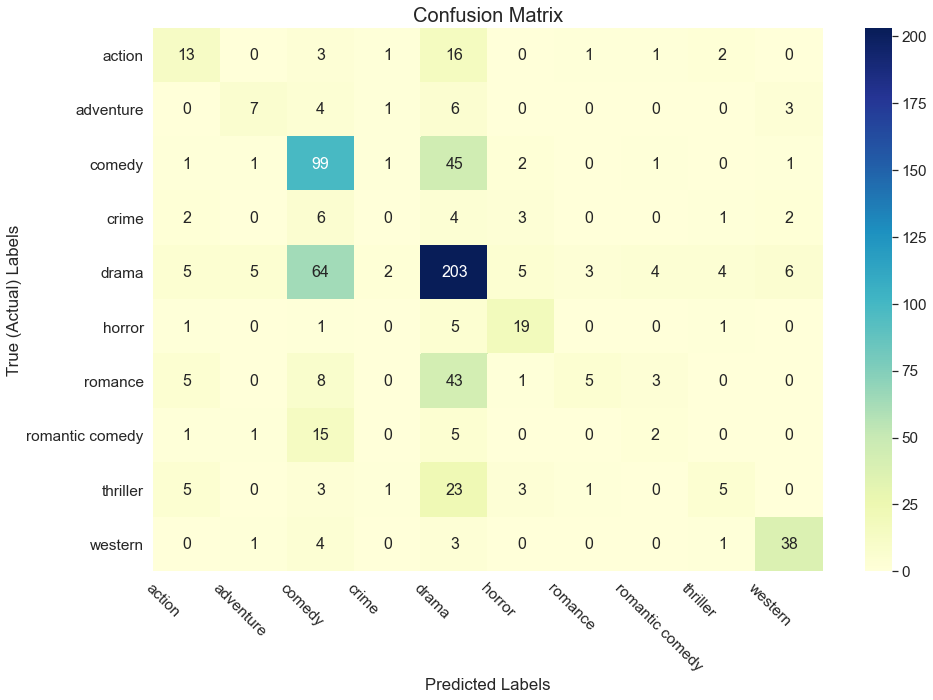

In [290]:
y_test_hat = model.predict(X_test_cleaned)
y_hat = np.argmax(y_test_hat, axis=1)
print_cf(y_test, np.argmax(y_test_hat, axis=1))

RNN also didn't really help in this instance. Generally, RNN's work the better for text and classification compared to CNN's. However, this may be a case of not enough data and the data we too have is too sparse because we only have a few thousand training examples over 10 labels.

## 'State-Of-The-Art' models (Transformers)

BERT is a transformer model. Which is a new kind of architecture for making neural nets. BERT itself isn't as 'state-of-the-art' anymore because it has been surpased by newer, bigger, and more powerful models. However, it's as big as I think we should all reasonably experiement with because it's still really powerful. But it takes up a lot of resources. For instance, the model itself trained can be a couple GB's of data. Which needs to get stored into RAM when used. 

### BERT (Bidirectional Encoder Representations from Transformers)

In [168]:
import tensorflow_hub as hub
import official.nlp.bert.tokenization as tokenization
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

*Downloading BERT*

In [ ]:
### Downloading BERT
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/2", trainable=False) ### Download BERT

BERT has a special kind of pre-processing that needs to happen before you can use it. Below are some steps of that process. Don't pay too much attention to the code because it's not as relevent unless you really want to know how BERT works. In which case, you can look up some youtube videos on how it works or read the original publishing. https://arxiv.org/abs/1810.04805

In [169]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy() 
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()  
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)
# 1. vocab_file: reads the vocab file associated to the downloaded model.
# 2. do_lower_case: reads binary variable which if True means tokenizer will reformat all text to lower 
#    case rendering model to be **NOT** case sensitive. Should be False by default. You can check in a cell below.
# 3. tokenizer: builds tokenizer using variables 1 and 2.

def encode_names(n, tokenizer):
    tokens = list(tokenizer.tokenize(n)) ### Tokenizes the string
    tokens.append('[SEP]') ### Add a [SEP] token to the end of each headline
    return tokenizer.convert_tokens_to_ids(tokens) ### Returns an array of Token ID's

def bert_encode(string_list, tokenizer, max_seq_length):
    num_examples = len(string_list)

    ### Encodes all the headlines as token ID's
    string_tokens = tf.ragged.constant([encode_names(n, tokenizer) for n in np.array(string_list)])

    cls = [tokenizer.convert_tokens_to_ids(['[CLS]'])]*string_tokens.shape[0] ### Creates an array of [CLS] token ID's
    input_word_ids = tf.concat([cls, string_tokens], axis=-1) ### Appends it to the front of all the headlines

    input_mask = tf.ones_like(input_word_ids).to_tensor(shape=(None, max_seq_length)) ### Creating an input mask of 1 and 0's

    ### Create and append a 0 to the beginning of the input mask for the [CLS] token 
    type_cls = tf.zeros_like(cls)
    type_tokens = tf.ones_like(string_tokens)
    input_type_ids = tf.concat([type_cls, type_tokens], axis=-1).to_tensor(shape=(None, max_seq_length))

    ### Puts everything into a dict
    inputs = {
      'input_word_ids': input_word_ids.to_tensor(shape=(None, max_seq_length)),
      'input_mask': input_mask,
      'input_type_ids': input_type_ids}

    return inputs

Process the training and testing data

In [170]:
max_seq_length = 512 # Maximum headline length

X_train_bert = bert_encode(X_train_raw, tokenizer, max_seq_length)
X_test_bert = bert_encode(X_test_raw, tokenizer, max_seq_length)
X_train_cleaned_bert = bert_encode(X_train_cleaned, tokenizer, max_seq_length)
X_test_cleaned_bert = bert_encode(X_test_cleaned, tokenizer, max_seq_length)

In [171]:
tf.keras.backend.clear_session()

Below I defined a BERT model with some extra advanced stuff on top of it. 

In [172]:
# Dropping out 20% of the embeddings on any given round of training
drop_embed = 0.2

# CNN Layer Architecture
n_conv_1 = n_conv_2 = n_conv_3 = 256

# Filter lengths of 4, 5, and 6 words
k_conv_1 = 4
k_conv_2 = 5
k_conv_3 = 6

# dense layer architecture: 
n_dense = 256
dropout = 0.2

input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,name="input_word_ids")
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,name="input_mask")
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="segment_ids")

pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

# Spatial Dropout 1D
x = tf.keras.layers.SpatialDropout1D(drop_embed, name='drop_embed')(sequence_output)

### Three parallel convolutional streams:
conv_1 = tf.keras.layers.Conv1D(filters=n_conv_1, kernel_size=k_conv_1, activation='relu', name='conv_1')(x)
maxp_1 = tf.keras.layers.GlobalAveragePooling1D(name='maxp_1')(conv_1)

conv_2 = tf.keras.layers.Conv1D(n_conv_2, k_conv_2, activation='relu', name='conv_2')(x)
maxp_2 = tf.keras.layers.GlobalAveragePooling1D(name='maxp_2')(conv_2)

conv_3 = tf.keras.layers.Conv1D(n_conv_3, k_conv_3, activation='relu', name='conv_3')(x)
maxp_3 = tf.keras.layers.GlobalAveragePooling1D(name='maxp_3')(conv_3)

### Concatenate the activations from three streams:
x = tf.keras.layers.concatenate([maxp_1, maxp_2, maxp_3])

x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(rate=0.2)(x)

x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(rate=0.1)(x)

output = tf.keras.layers.Dense(10, activation='softmax', name='output')(x)

model = tf.keras.Model(
    inputs={
        'input_word_ids': input_word_ids,
        'input_mask': input_mask,
        'input_type_ids': segment_ids
        },
        outputs=output)

In [173]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 512)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 512)]        0                                            
__________________________________________________________________________________________________
keras_layer_2 (KerasLayer)      [(None, 768), (None, 177853441   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

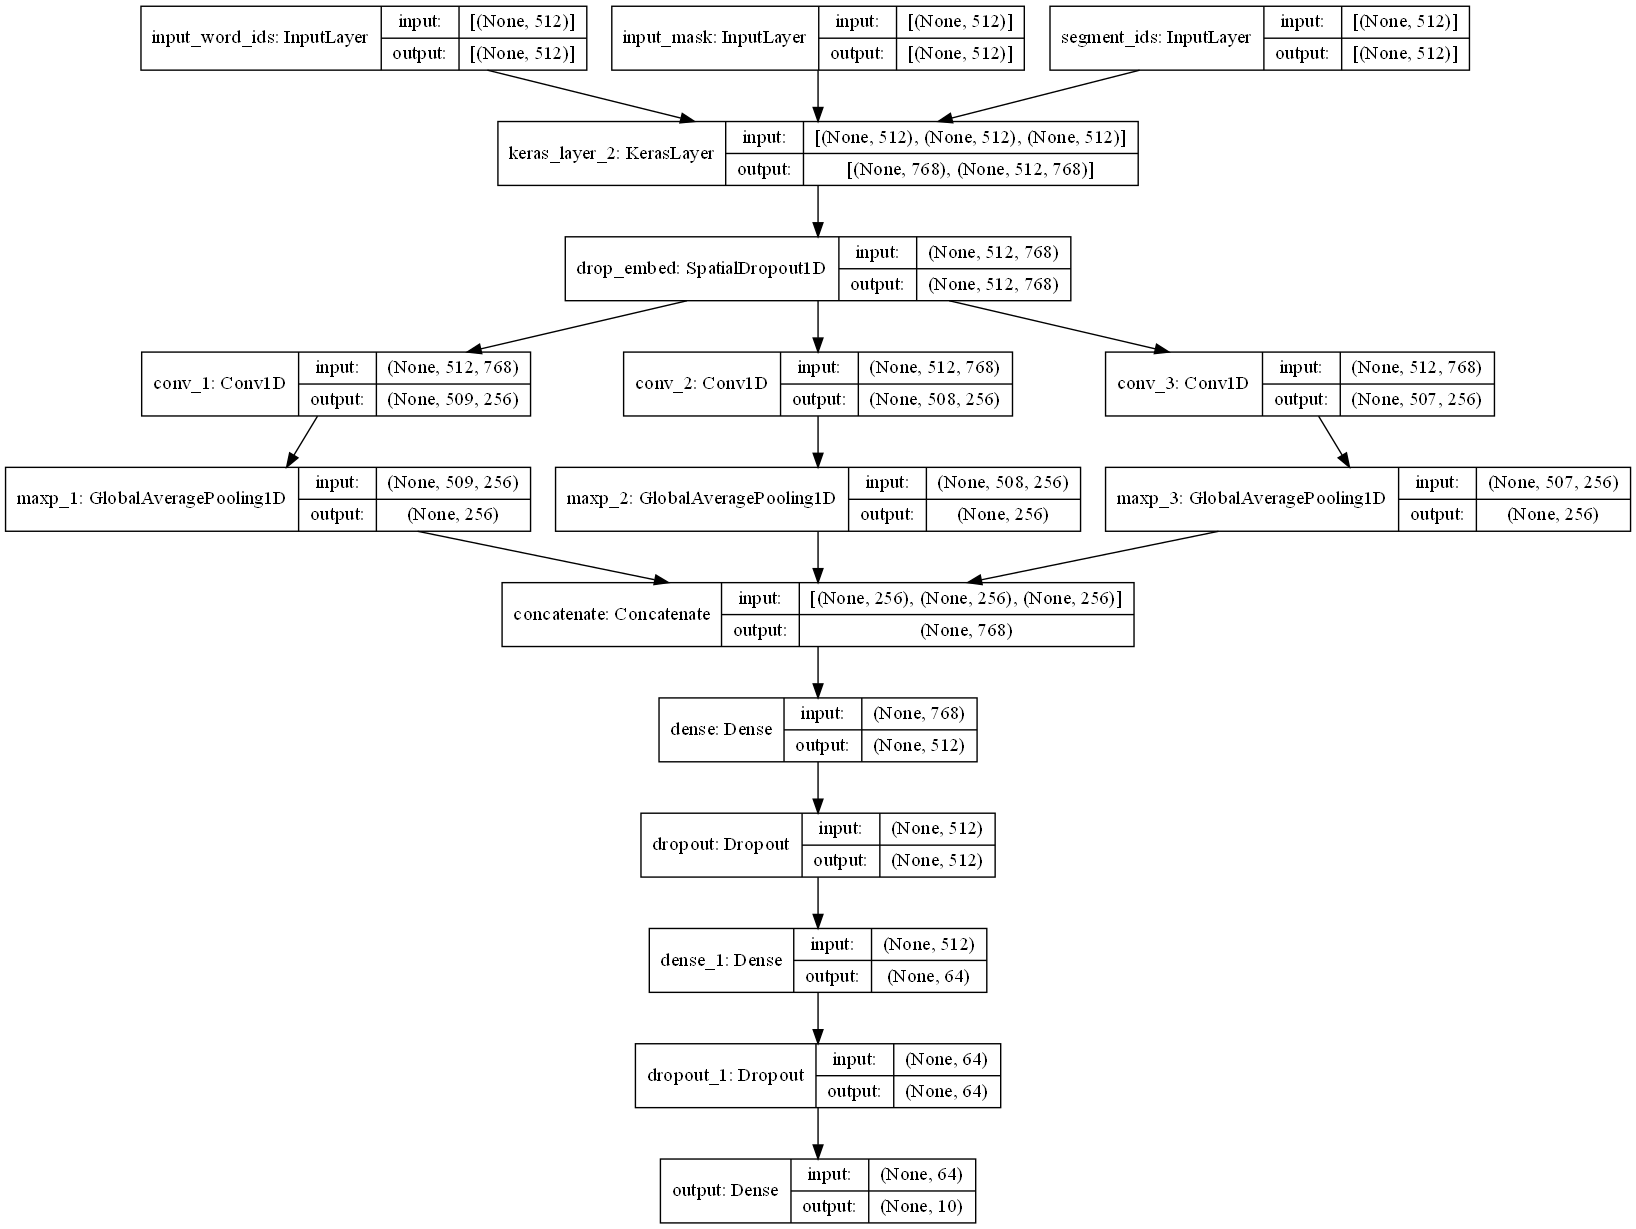

In [174]:
tf.keras.utils.plot_model(model, show_shapes=True, dpi=100)

In [176]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(patience=3, # Stop after 3 epochs of no improvement
                               monitor='val_loss', # Look at validation_loss
                               min_delta=0, # After 0 change
                               mode='min', # Stop when quantity has stopped decreasing
                               restore_best_weights=True, # Restore the best weights
                               verbose=1) 

history = model.fit(X_train_bert,
                    y_train, 
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

print('\n')
plot_history(history)

Epoch 1/20
19/19 [==============================] - 54s 3s/step - loss: 2.0333 - accuracy: 0.3165 - val_loss: 1.8509 - val_accuracy: 0.3515
Epoch 2/20
19/19 [==============================] - 48s 3s/step - loss: 1.7859 - accuracy: 0.3588 - val_loss: 1.6704 - val_accuracy: 0.4044
Epoch 3/20
19/19 [==============================] - 48s 3s/step - loss: 1.6363 - accuracy: 0.3938 - val_loss: 1.5391 - val_accuracy: 0.4232
Epoch 4/20
19/19 [==============================] - 48s 3s/step - loss: 1.5423 - accuracy: 0.4357 - val_loss: 1.4421 - val_accuracy: 0.5119
Epoch 5/20
19/19 [==============================] - 48s 3s/step - loss: 1.4671 - accuracy: 0.4814 - val_loss: 1.4724 - val_accuracy: 0.4846
Epoch 6/20
19/19 [==============================] - 48s 3s/step - loss: 1.4101 - accuracy: 0.4989 - val_loss: 1.3669 - val_accuracy: 0.5034
Epoch 7/20
19/19 [==============================] - 48s 3s/step - loss: 1.3478 - accuracy: 0.5246 - val_loss: 1.3226 - val_accuracy: 0.5392
Epoch 8/20
19/19 [==

In [177]:
y_test_hat = model.predict(X_test_bert)
y_hat = np.argmax(y_test_hat, axis=1)
print_cf(y_test, np.argmax(y_test_hat, axis=1))

Finally with a new and powerful architecture that we able to get over **60% accuracy!!!** Woohooo

## Conclusion

In this crash course, we went over many baseline models like Naive Bayes, SVM, and Logistic Regression. Logistic Regression was able to get around 58% accuracy. Random Forest, XGBoost, and Gradient Boosting all performed worse than the Logistic Regression baseline. This shows that sometimes, the simpler models are still relevant and shouldn't be discredited. 

The deep learning models also didn't perform as well as Logistic Regression until we used BERT with a fancier CNN architecture. Even then, we were only able to get around 60% accuracy by having a model somewhere in the neighborhood of around 5GB's in size vs a few MB's (Logistic Regression). 

**Why didn't the more powerful ML models do consistently better?**

I believe this is a case of not having enough data and the data being too sparse over . 

**Some of the important stuff to remember**
1. Cleaning the data
  - With using machine learning with text, cleaning the dataset can be very important. Sometimes the text may need a little but of cleaning (like removing punctuation) and overtimes it needs a lot.
2. Splitting the data into a training set and testing set (sometimes a validation set as well)
  - Splitting the data into a testing and training set will allow us to train the model on the training data and evaluate it on the testing data. We do this because we want to see how well the models perform on data it's never seen before.
3. Tokenizing the data and label encoding 
  - Before feeding text of any kind into a machine learning model, we need to convert the words into tokens or embeddings (we didn't go over embeddings, yet).
    - This is because machine learning models only uses and understands numbers.
  - Some of the ways I shown how to tokenize data is by:
    - Incorporating a CountVectorizer() or tfidfvectorizer() (from Sklearn) into the Pipeline
    - Creating separate CountVectorizer() or tfidfvectorizer() objects
    - Creating a model that automatically does this for us using the TextVectorization layer (from TensorFlow). 
  - In general, using the TextVectorization method for Deep Learning models is preferred, but you can also use the CountVectorizer or tfidfvectorizer methods as well. 
4. Creating a baseline (model)
  - As we saw, sometimes jumping into something as advanced as Deep Learning might not be much of an improvement over using something like Logistic Regression. 
    - While Logistic Regression having as good of a performance as deep learning models this isn't always the case, there are certain scenarios where this true. Like what we saw earlier.
5. Try tuning hyperparameters
  - One way I showed how to do this is by using RandomSearchCV. This is a nice way to experiment with trying to get the best performance out of a model. However, it can sometimes take a really long time to do. 
    - A good place to look up what hyperparamters to tune is by typing up something like 'Random Search for Random Forest' on google and see what other people did. This works well 'enough' so you don't necessarily have to go out and research what each hyperparameter does. 
6. Try deep learning if you have the resources
  - Deep learning on google colab can take a while sometimes. But when there is a lot of data available, using deep learning almost always improves performance.
7. There's a lot I didn't talk about in this tutorial. Watch more videos on NLP and machine learning to learn about things like Bias and Variance, Dimensionality Reduction, Vector Embedding, etc... There will also be a follow up tutorial that shows how to actually save these models once they are trained so they can just be loaded into a separate program. Also, there will be another tutorial on multi-class classification. Where the model predicts either 0 or many labels instead of just 1 (like what this tutorial went over).  


<hr>

### Other datasets to try this kind of problem on 

https://www.kaggle.com/kishanyadav/inshort-news
- Classify the news category (news_category) with only the news article (news_article) or headline (news_headline)
